In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Update CUDA
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.6.0/local_installers/cuda-repo-ubuntu1804-11-6-local_11.6.0-510.39.01-1_amd64.deb
!sudo dpkg -i 'cuda-repo-ubuntu1804-11-6-local_11.6.0-510.39.01-1_amd64.deb'
!sudo apt-key add /var/cuda-repo-ubuntu1804-11-6-local/7fa2af80.pub
!sudo apt-get update
!sudo DEBIAN_FRONTEND=noninteractive apt-get -y install cuda-11-6
!sudo cp /usr/include/x86_64-linux-gnu/cudnn*.h /usr/local/cuda-11.6/include
!sudo cp /usr/lib/x86_64-linux-gnu/libcudnn* /usr/local/cuda-11.6/lib64
!sudo chmod a+r /usr/local/cuda-11.6/include/cudnn*.h /usr/local/cuda-11.6/lib64/libcudnn*
old_ld_library_path = %env LD_LIBRARY_PATH
new_ld_library_path = "/usr/local/cuda-11.6/lib64:" + old_ld_library_path
%env LD_LIBRARY_PATH={new_ld_library_path}
%env CUDA_HOME=/usr/local/cuda-11.6

# Update CMake
!rm -rf deps
!mkdir deps
%cd /content/deps
!wget --no-check-certificate https://www.cmake.org/files/v3.14/cmake-3.14.0-Linux-x86_64.tar.gz
!tar -xvf cmake-3.14.0-Linux-x86_64.tar.gz > /dev/null
%mv cmake-3.14.0-Linux-x86_64 cmake-install
old_path = %env PATH
new_path = "/content/deps/cmake-install:/content/deps/cmake-install/bin:" + old_path
%env PATH={new_path}
%cd /content/
!cmake --version

# Update g++
!sudo add-apt-repository ppa:ubuntu-toolchain-r/test -y
!sudo apt-get update
!sudo apt-get install gcc-10 g++-10 -y
!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-10 60 --slave /usr/bin/g++ g++ /usr/bin/g++-10

--2024-03-18 06:16:01--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2024-03-18 06:16:01 (4.41 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2024-03-18 06:16:01--  https://developer.download.nvidia.com/compute/cuda/11.6.0/local_installers/cuda-repo-ubuntu1804-11-6-local_11.6.0-510.39.01-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 O

##Installed Programs & GPU

In [4]:
%%bash
# Preinstalled compiler versions
g++ --version
gcc --version
# Check installed CMake version
cmake --version
echo ""
# Preinstalled pytorch/torchvision versions
pip show torch
echo ""
pip show torchvision
echo ""
# CUDA Information
nvcc --version

g++ (Ubuntu 10.5.0-1ubuntu1~22.04) 10.5.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

gcc (Ubuntu 10.5.0-1ubuntu1~22.04) 10.5.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

cmake version 3.14.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cud

In [ ]:
!g++ --version

g++ (Ubuntu 10.5.0-1ubuntu1~22.04) 10.5.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



##Clone Repo

In [5]:
%cd /content
!rm -rf CS263-CNN-Python-CPP-Comparison
!git clone https://github.com/rastadayon/CS263-CNN-Python-CPP-Comparison.git
%cd CS263-CNN-Python-CPP-Comparison
%ls

/content
Cloning into 'CS263-CNN-Python-CPP-Comparison'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 293 (delta 95), reused 241 (delta 59), pack-reused 0
Receiving objects: 100% (293/293), 11.46 MiB | 10.07 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/CS263-CNN-Python-CPP-Comparison
CPP/  Neural_Network_from_scratch_python.ipynb  Python/  README.md


# System information

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
!uname -a

Linux afdb1089fbfe 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
!cat /proc/cpuinfo

In [ ]:
!cat /proc/meminfo

MemTotal:       13290480 kB
MemFree:          842696 kB
MemAvailable:   12311780 kB
Buffers:           85296 kB
Cached:         11283852 kB
SwapCached:            0 kB
Active:          1051964 kB
Inactive:       10802260 kB
Active(anon):       1272 kB
Inactive(anon):   485760 kB
Active(file):    1050692 kB
Inactive(file): 10316500 kB
Unevictable:           4 kB
Mlocked:               4 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               224 kB
Writeback:             0 kB
AnonPages:        485024 kB
Mapped:           269008 kB
Shmem:              1952 kB
KReclaimable:     427296 kB
Slab:             496820 kB
SReclaimable:     427296 kB
SUnreclaim:        69524 kB
KernelStack:        4336 kB
PageTables:         9740 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645240 kB
Committed_AS:    2027508 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       10576 kB
VmallocChunk:    

#Python

In [19]:
%cd /content/CS263-CNN-Python-CPP-Comparison/Python

/content/CS263-CNN-Python-CPP-Comparison/Python


In [ ]:
num_epoch_values = [5, 10, 20, 40, 70, 100]
batch_size_values = [8, 16, 32, 64, 128, 256]
kernel_size_values = [3, 5, 8, 10, 15]
optimizer_values = ['adam', 'SGD']
num_layers_values = [3, 4, 5, 6]

default_num_epochs = 5
default_batch_size = 8
default_kernel_size = 3
default_optimizer = 'adam'
default_num_layers = 3
times_run = 10

In [20]:
from CNN import ConvNet
model = ConvNet(
                input_channels=3,
                num_classes=10,
                channel_size=16,
                kernel_size=8,
                num_layers=3
            )
model

ConvNet(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(8, 8), stride=(1, 1), padding=(4, 4))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(8, 8), stride=(1, 1), padding=(4, 4))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(8, 8), stride=(1, 1), padding=(4, 4))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear

In [21]:
import torch
inp = torch.randn(1, 3, 32, 32)

In [22]:
layer_1 = model.conv_layers[0]
layer_2 = model.conv_layers[1]
layer_3 = model.conv_layers[2]

In [23]:
layer_1(inp).shape

torch.Size([1, 16, 16, 16])

In [24]:
layer_2(layer_1(inp)).shape

torch.Size([1, 32, 8, 8])

In [25]:
layer_3(layer_2(layer_1(inp))).shape

torch.Size([1, 64, 4, 4])

In [26]:
model.pool(layer_3(layer_2(layer_1(inp)))).shape

torch.Size([1, 64, 1, 1])

In [ ]:
from CNN import ConvNet
model = ConvNet(
                input_channels=3,
                num_classes=10,
                channel_size=16,
                kernel_size=3,
                num_layers=6
            )
model

ConvNet(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3)

## Epochs

In [ ]:
for num_epochs in num_epoch_values:
    !python3 /content/CS263-CNN-Python-CPP-Comparison/Python/runtime_experiment.py \
        times_run $times_run num_epochs $num_epochs batch_size $default_batch_size \
        kernel_size $default_kernel_size optimizer $default_optimizer \
        num_layers $default_num_layers

kwargs: {'times_run': '10', 'num_epochs': '5', 'batch_size': '8', 'kernel_size': '3', 'optimizer': 'adam', 'num_layers': '3'}
100% 170498071/170498071 [00:01<00:00, 99809311.43it/s] 
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
ROUND 1 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 2.0242, Accuracy: 0.2640
	Epoch [2/5], Train set - Loss: 1.8403, Accuracy: 0.3170
	Epoch [3/5], Train set - Loss: 1.7470, Accuracy: 0.3585
	Epoch [4/5], Train set - Loss: 1.6851, Accuracy: 0.3885
	Epoch [5/5], Train set - Loss: 1.6316, Accuracy: 0.4110
	Starting Testing...
	Testing finished!
	Test set - Loss: 1.6316, Accuracy: 0.4110
ROUND 2 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 1.5719, Accuracy: 0.4405
	Epoch [2/5], Train set - Loss: 1.4930, Accuracy: 0.4735
	Epoch [3/5], Train set - Loss: 1.4610, Accuracy: 0.4885
	Epoch [4/5], Train set - Loss: 1.4155, Accuracy: 0.4895
	Epoch [5/5], Train set - Loss: 1.3667, Accuracy: 0.5210
	Star

## Batches

In [ ]:
for batch_size in batch_size_values:
    !python3 /content/CS263-CNN-Python-CPP-Comparison/Python/runtime_experiment.py \
        times_run $times_run num_epochs $default_num_epochs batch_size $batch_size \
        kernel_size $default_kernel_size optimizer $default_optimizer \
        num_layers $default_num_layers

kwargs: {'times_run': '10', 'num_epochs': '5', 'batch_size': '8', 'kernel_size': '3', 'optimizer': 'adam', 'num_layers': '3'}
ROUND 1 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 2.0049, Accuracy: 0.2560
	Epoch [2/5], Train set - Loss: 1.8264, Accuracy: 0.3310
	Epoch [3/5], Train set - Loss: 1.7303, Accuracy: 0.3755
	Epoch [4/5], Train set - Loss: 1.6707, Accuracy: 0.3910
	Epoch [5/5], Train set - Loss: 1.5877, Accuracy: 0.4360
	Starting Testing...
	Testing finished!
	Test set - Loss: 1.5877, Accuracy: 0.4360
ROUND 2 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 1.5361, Accuracy: 0.4620
	Epoch [2/5], Train set - Loss: 1.5034, Accuracy: 0.4805
	Epoch [3/5], Train set - Loss: 1.4487, Accuracy: 0.4910
	Epoch [4/5], Train set - Loss: 1.4034, Accuracy: 0.5040
	Epoch [5/5], Train set - Loss: 1.3713, Accuracy: 0.5155
	Starting Testing...
	Testing finished!
	Test set - Loss: 1.3713, Accuracy: 0.5155
ROUND 3 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 1

## Kernel Size

In [ ]:
for kernel_size in kernel_size_values:
    !python3 /content/CS263-CNN-Python-CPP-Comparison/Python/runtime_experiment.py \
        times_run $times_run num_epochs $default_num_epochs batch_size $default_batch_size \
        kernel_size $kernel_size optimizer $default_optimizer \
        num_layers $default_num_layers

kwargs: {'times_run': '10', 'num_epochs': '5', 'batch_size': '8', 'kernel_size': '3', 'optimizer': 'adam', 'num_layers': '3'}
100% 170498071/170498071 [00:03<00:00, 43348742.75it/s]
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
ROUND 1 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 2.0113, Accuracy: 0.2535
	Epoch [2/5], Train set - Loss: 1.8007, Accuracy: 0.3365
	Epoch [3/5], Train set - Loss: 1.7397, Accuracy: 0.3685
	Epoch [4/5], Train set - Loss: 1.6665, Accuracy: 0.3995
	Epoch [5/5], Train set - Loss: 1.6117, Accuracy: 0.4275
	Starting Testing...
	Testing finished!
	Test set - Loss: 1.6117, Accuracy: 0.4275
ROUND 2 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 1.5451, Accuracy: 0.4430
	Epoch [2/5], Train set - Loss: 1.5120, Accuracy: 0.4585
	Epoch [3/5], Train set - Loss: 1.4323, Accuracy: 0.4935
	Epoch [4/5], Train set - Loss: 1.4135, Accuracy: 0.5000
	Epoch [5/5], Train set - Loss: 1.3760, Accuracy: 0.5165
	Start

## Number of Layers

In [ ]:
for num_layers in num_layers_values:
    !python3 /content/CS263-CNN-Python-CPP-Comparison/Python/runtime_experiment.py \
        times_run $times_run num_epochs $default_num_epochs batch_size $default_batch_size \
        kernel_size $default_kernel_size optimizer $default_optimizer \
        num_layers $num_layers

kwargs: {'times_run': '10', 'num_epochs': '5', 'batch_size': '8', 'kernel_size': '3', 'optimizer': 'adam', 'num_layers': '3'}
Number of parameters: 24458
ROUND 1 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 2.0140, Accuracy: 0.2595
	Epoch [2/5], Train set - Loss: 1.8208, Accuracy: 0.3340
	Epoch [3/5], Train set - Loss: 1.7186, Accuracy: 0.3780
	Epoch [4/5], Train set - Loss: 1.6467, Accuracy: 0.3975
	Epoch [5/5], Train set - Loss: 1.5700, Accuracy: 0.4290
	Starting Testing...
	Testing finished!
	Test set - Loss: 1.5700, Accuracy: 0.4290
ROUND 2 / 10
	Starting Training...
	Epoch [1/5], Train set - Loss: 1.5294, Accuracy: 0.4590
	Epoch [2/5], Train set - Loss: 1.4529, Accuracy: 0.4830
	Epoch [3/5], Train set - Loss: 1.4293, Accuracy: 0.4880
	Epoch [4/5], Train set - Loss: 1.3826, Accuracy: 0.5175
	Epoch [5/5], Train set - Loss: 1.3752, Accuracy: 0.5145
	Starting Testing...
	Testing finished!
	Test set - Loss: 1.3752, Accuracy: 0.5145
ROUND 3 / 10
	Starting Training...
	Epoc

# C++

## Generate Build System

In [6]:
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP
%rm -rf build
!cmake -B build -D CUDA_V=11.8 -D CMAKE_BUILD_TYPE=Release

/content/CS263-CNN-Python-CPP-Comparison/CPP
-- The CXX compiler identification is GNU 10.5.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Could not find compatible Torch version (>= 1.12.0, <= 2.1.1)
-- Downloading libtorch version 2.1.1 for CUDA 11.8 on Linux from https://download.pytorch.org/libtorch/cu118/libtorch-shared-with-deps-2.1.1%2Bcu118.zip...
-- Downloading libtorch - done
-- Found CUDA: /usr/local/cuda (found version "12.2") 
-- The CUDA compiler identification is NVIDIA 12.2.140
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc -- works
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Found CUDAToolkit: /usr/local/cuda/include (found version "12.2.140") 
--

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

##Build Tutorials

In [31]:
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP
#!cmake --build build
!cmake --build build --target intermediate

/content/CS263-CNN-Python-CPP-Comparison/CPP
gmake[1]: Entering directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
gmake[2]: Entering directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
gmake[3]: Entering directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
gmake[3]: Leaving directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
gmake[3]: Entering directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
gmake[3]: Leaving directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
[  0%] Built target penntreebank
gmake[3]: Entering directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
gmake[3]: Leaving directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
[ 21%] Built target language-model
gmake[3]: Entering directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
gmake[3]: Leaving directory '/content/CS263-CNN-Python-CPP-Comparison/CPP/build'
[ 30%] Built target image-io
gmake[3]: Entering directory '/content/CS2

In [15]:
num_epoch_values = [5, 10, 20, 40, 70, 100]
batch_size_values = [8, 16, 32, 64, 128, 256]
# kernel_size_values = [3, 5, 8, 10, 15]
kernel_size_values = [8, 10, 15]
optimizer_values = ['Adam', 'SGD']
num_layers_values = [3, 4, 5, 6]

default_num_epochs = 5
default_batch_size = 8
default_kernel_size = 3
default_optimizer = 'Adam'
default_num_layers = 3
times_run = 10

## Epochs

In [ ]:
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
#batch size and then epochs as the arguments
for num_epochs in num_epoch_values:
    !./convolutional-neural-network 0 $default_batch_size $num_epochs $default_kernel_size $default_num_layers $default_optimizer


/content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network
Convolutional Neural Network

Training on CPU.
is_profiling : 0
batch_size : 8 - num_epochs : 5 - kernel_size : 3 - num_layers : 3 - optimizer_name : Adam
This is the number of training samples: 2000
This is the number of testing samples: 500
Train Loader Done!
Test Loader Done!
Optimizer Done!
Training...
Round: 0
Epoch [1/5], Trainset - Loss: 2.0117, Accuracy: 0.2545
Epoch [2/5], Trainset - Loss: 1.8219, Accuracy: 0.3230
Epoch [3/5], Trainset - Loss: 1.7218, Accuracy: 0.3625
Epoch [4/5], Trainset - Loss: 1.6698, Accuracy: 0.3855
Epoch [5/5], Trainset - Loss: 1.6028, Accuracy: 0.4145
Testset - Loss: 1.9072, Accuracy: 0.3380
Optimizer Done!
Training...
Round: 1
Epoch [1/5], Trainset - Loss: 2.0337, Accuracy: 0.2560
Epoch [2/5], Trainset - Loss: 1.8496, Accuracy: 0.3220
Epoch [3/5], Trainset - Loss: 1.7321, Accuracy: 0.3715
Epoch [4/5], Trainset - Loss: 1.6577, Accuracy: 0.3980
Epoch [

## Batches

In [38]:
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
#batch size and then epochs as the arguments
for batch_size in batch_size_values:
    !./convolutional-neural-network 0 $batch_size $default_num_epochs $default_kernel_size $default_num_layers $default_optimizer


/content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network
Convolutional Neural Network

Training on CPU.
is_profiling : 0
batch_size : 8 - num_epochs : 5 - kernel_size : 3 - num_layers : 3 - optimizer_name : Adam
This is the number of training samples: 2000
This is the number of testing samples: 500
Train Loader Done!
Test Loader Done!
Optimizer Done!
Training...
Round: 0
Epoch [1/5], Trainset - Loss: 2.0052, Accuracy: 0.2750
Epoch [2/5], Trainset - Loss: 1.8284, Accuracy: 0.3115
Epoch [3/5], Trainset - Loss: 1.7083, Accuracy: 0.3705
Epoch [4/5], Trainset - Loss: 1.6750, Accuracy: 0.3925
Epoch [5/5], Trainset - Loss: 1.5854, Accuracy: 0.4270
Testset - Loss: 1.6321, Accuracy: 0.4000
Optimizer Done!
Training...
Round: 1
Epoch [1/5], Trainset - Loss: 2.0025, Accuracy: 0.2605
Epoch [2/5], Trainset - Loss: 1.8281, Accuracy: 0.3295
Epoch [3/5], Trainset - Loss: 1.7220, Accuracy: 0.3580
Epoch [4/5], Trainset - Loss: 1.6751, Accuracy: 0.3850
Epoch [

## Kernel Size

In [32]:
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
for kernel_size in kernel_size_values:
    !./convolutional-neural-network 0 $default_batch_size $default_num_epochs $kernel_size $default_num_layers $default_optimizer


/content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network
Convolutional Neural Network

Training on CPU.
is_profiling : 0
batch_size : 8 - num_epochs : 5 - kernel_size : 8 - num_layers : 3 - optimizer_name : Adam
This is the number of training samples: 2000
This is the number of testing samples: 500
Train Loader Done!
Test Loader Done!
HERE
Optimizer Done!
Training...
Round: 1
Epoch [1/5], Trainset - Loss: 2.0005, Accuracy: 0.2570
Epoch [2/5], Trainset - Loss: 1.7997, Accuracy: 0.3365
Epoch [3/5], Trainset - Loss: 1.7110, Accuracy: 0.3805
Epoch [4/5], Trainset - Loss: 1.6042, Accuracy: 0.4125
Epoch [5/5], Trainset - Loss: 1.5424, Accuracy: 0.4365
Testset - Loss: 1.8720, Accuracy: 0.3240
Optimizer Done!
Training...
Round: 2
Epoch [1/5], Trainset - Loss: 1.9576, Accuracy: 0.2655
Epoch [2/5], Trainset - Loss: 1.7523, Accuracy: 0.3680
Epoch [3/5], Trainset - Loss: 1.6346, Accuracy: 0.4145
Epoch [4/5], Trainset - Loss: 1.5773, Accuracy: 0.4250
Ep

## Number of Layers

In [68]:
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
for num_layers in num_layers_values:
    !./convolutional-neural-network 0 $default_batch_size $default_num_epochs $default_kernel_size $num_layers $default_optimizer


/content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network
Convolutional Neural Network

Training on CPU.
is_profiling : 0
batch_size : 8 - num_epochs : 5 - kernel_size : 3 - num_layers : 3 - optimizer_name : Adam
This is the number of training samples: 2000
This is the number of testing samples: 500
Train Loader Done!
Test Loader Done!
HERE
Optimizer Done!
Training...
Round: 1
Epoch [1/5], Trainset - Loss: 2.0010, Accuracy: 0.2455
Epoch [2/5], Trainset - Loss: 1.8104, Accuracy: 0.3330
Epoch [3/5], Trainset - Loss: 1.7200, Accuracy: 0.3685
Epoch [4/5], Trainset - Loss: 1.6472, Accuracy: 0.4000
Epoch [5/5], Trainset - Loss: 1.5959, Accuracy: 0.4150
Testset - Loss: 1.6431, Accuracy: 0.4180
Optimizer Done!
Training...
Round: 2
Epoch [1/5], Trainset - Loss: 2.0308, Accuracy: 0.2380
Epoch [2/5], Trainset - Loss: 1.8128, Accuracy: 0.3295
Epoch [3/5], Trainset - Loss: 1.7442, Accuracy: 0.3500
Epoch [4/5], Trainset - Loss: 1.6714, Accuracy: 0.3950
Ep

## Optimizers

In [69]:
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
for optimizer in optimizer_values:
    !./convolutional-neural-network 0 $default_batch_size $default_num_epochs $default_kernel_size $default_num_layers $optimizer


/content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network
Convolutional Neural Network

Training on CPU.
is_profiling : 0
batch_size : 8 - num_epochs : 5 - kernel_size : 3 - num_layers : 3 - optimizer_name : Adam
This is the number of training samples: 2000
This is the number of testing samples: 500
Train Loader Done!
Test Loader Done!
HERE
Optimizer Done!
Training...
Round: 1
Epoch [1/5], Trainset - Loss: 2.0119, Accuracy: 0.2565
Epoch [2/5], Trainset - Loss: 1.7911, Accuracy: 0.3185
Epoch [3/5], Trainset - Loss: 1.7021, Accuracy: 0.3805
Epoch [4/5], Trainset - Loss: 1.6307, Accuracy: 0.4100
Epoch [5/5], Trainset - Loss: 1.5531, Accuracy: 0.4280
Testset - Loss: 2.1128, Accuracy: 0.3340
Optimizer Done!
Training...
Round: 2
Epoch [1/5], Trainset - Loss: 2.0270, Accuracy: 0.2485
Epoch [2/5], Trainset - Loss: 1.8319, Accuracy: 0.3235
Epoch [3/5], Trainset - Loss: 1.7275, Accuracy: 0.3620
Epoch [4/5], Trainset - Loss: 1.6532, Accuracy: 0.3890
Ep

In [ ]:
16.128!python3 --version
!which python3

Python 3.10.12
/usr/bin/python3


# CPP Profiler

In [ ]:
!sudo apt-get install google-perftools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
google-perftools is already the newest version (2.9.1-0ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [ ]:
! apt-get install valgrind kcachegrind

In [ ]:
!apt-get install gperf  libgoogle-perftools-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libunwind-dev
The following NEW packages will be installed:
  gperf libgoogle-perftools-dev libunwind-dev
0 upgraded, 3 newly installed, 0 to remove and 50 not upgraded.
Need to get 2,456 kB of archives.
After this operation, 10.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 gperf amd64 3.1-1build1 [103 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libunwind-dev amd64 1.3.2-2build2.1 [1,883 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgoogle-perftools-dev amd64 2.9.1-0ubuntu3 [470 kB]
Fetched 2,456 kB in 1s (1,668 kB/s)
Selecting previously unselected package gperf.
(Reading database ... 130042 files and directories currently installed.)
Preparing to unpack .../gperf_3.1-1build1_amd64.deb ...
Unpacking gperf (3.1-1build1) ...
Selecting previ

In [ ]:
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
#batch size and then epochs as the arguments
!./convolutional-neural-network

/content/pytorch-cpp-cnn/CPP/build/tutorials/intermediate/convolutional_neural_network
Convolutional Neural Network

Training on CPU.
This is the number of training samples: 2000
This is the number of testing samples: 500
Train Loader Done!
Test Loader Done!
Model Done!
Optimizer Done!
Training...
epoch: 1
Doing batch 0
Doing batch 1
Doing batch 2
Doing batch 3
Doing batch 4
Doing batch 5
Doing batch 6
Doing batch 7
Doing batch 8
Doing batch 9
Doing batch 10
Doing batch 11
Doing batch 12
Doing batch 13
Doing batch 14
Doing batch 15
Doing batch 16
Doing batch 17
Doing batch 18
Doing batch 19
Doing batch 20
Doing batch 21
Doing batch 22
Doing batch 23
Doing batch 24
Doing batch 25
Doing batch 26
Doing batch 27
Doing batch 28
Doing batch 29
Doing batch 30
Doing batch 31
Doing batch 32
Doing batch 33
Doing batch 34
Doing batch 35
Doing batch 36
Doing batch 37
Doing batch 38
Doing batch 39
Doing batch 40
Doing batch 41
Doing batch 42
Doing batch 43
Doing batch 44
Doing batch 45
Doing batch 

In [ ]:
!gprof ./convolutional-neural-network gmon.out > profile.txt

In [ ]:
# Run
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
#batch size and then epochs as the arguments
!valgrind --tool=callgrind --instr-atstart=yes --cache-sim=no ./convolutional-neural-network


/content/pytorch-cpp-cnn/CPP/build/tutorials/intermediate/convolutional_neural_network
==42792== Callgrind, a call-graph generating cache profiler
==42792== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==42792== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==42792== Command: ./convolutional-neural-network
==42792== 
==42792== For interactive control, run 'callgrind_control -h'.
==42792== brk segment overflow in thread #1: can't grow to 0x484f000
==42792== (see section Limitations in user manual)
==42792== NOTE: further instances of this message will not be shown
Convolutional Neural Network

Training on CPU.
This is the number of training samples: 2000
This is the number of testing samples: 500
Train Loader Done!
Test Loader Done!
Model Done!
Optimizer Done!
Training...
epoch: 1
Doing batch 0
Doing batch 1
Doing batch 2
Doing batch 3
Doing batch 4
Doing batch 5
Doing batch 6
Doing batch 7
Doing batch 8
Doing batch 9
Doing batch 10
Doing bat

In [ ]:
# Run
%%time
%cd /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/
#batch size and then epochs as the arguments
!./convolutional-neural-network

/content/pytorch-cpp-cnn/CPP/build/tutorials/intermediate/convolutional_neural_network
Convolutional Neural Network

terminate called after throwing an instance of 'pybind11::error_already_set'
  what():  ImportError: Failed to load PyTorch C extensions:
    It appears that PyTorch has loaded the `torch/_C` folder
    of the PyTorch repository rather than the C extensions which
    are expected in the `torch._C` namespace. This can occur when
    using the `install` workflow. e.g.
        $ python setup.py install && python -c "import torch"

    This error can generally be solved using the `develop` workflow
        $ python setup.py develop && python -c "import torch"  # This should succeed
    or by running Python from a different directory.

At:
  /usr/local/lib/python3.10/dist-packages/torch/__init__.py(519): <module>
  <frozen importlib._bootstrap>(488): _call_with_frames_removed
  <frozen importlib._bootstrap_external>(995): exec_module
  <frozen importlib._bootstrap>(950): _loa

In [ ]:
!gprof

a.out: No such file or directory


In [ ]:
!gprof ./convolutional-neural-network gmon.out > analysis.txt


In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

# Python Profiler

In [ ]:
!pip install py-spy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.2 MB/s eta 0:00:00


In [ ]:
%cd /content/CS263-CNN-Python-CPP-Comparison/Python
!py-spy record -o profile.json -f speedscope -- python main.py


/content/pytorch-cpp-cnn/Python
py-spy> Sampling process 100 times a second. Press Control-C to exit.

STAGE:2024-03-14 07:14:27 62036:62036 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
ROUND 1 / 1
Starting Training...
Epoch [1/1], Trainset - Loss: 2.0306, Accuracy: 0.2590
Total train time: 6.124033212661743
STAGE:2024-03-14 07:14:35 62036:62036 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2024-03-14 07:14:35 62036:62036 ActivityProfilerController.cpp:324] Completed Stage: Post Processing
ERROR:2024-03-14 07:15:05 62036:62036 CudaDeviceProperties.cpp:27] cudaGetDeviceCount failed with code 35
Traceback (most recent call last):
  File "/content/pytorch-cpp-cnn/Python/main.py", line 126, in <module>
    prof.export_stacks('profiling_results.txt')
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/profiler.py", line 359, in export_stacks
    assert self.with_stack, "export_stacks() requires with_stack=True"
AssertionError: export_stacks

In [ ]:
!cp '/content/drive/Shareddrives/Runtime Systems   /profile.json' '/content/pytorch-cpp-cnn/Python/'

In [ ]:
!py-spy top -p $(pgrep -f '/content/pytorch-cpp-cnn/Python/main.py') --output profie_python_final.json

error: Found argument '--output' which wasn't expected, or isn't valid in this context

	If you tried to supply `--output` as a value rather than a flag, use `-- --output`

USAGE:
    py-spy top --pid <pid>

For more information try --help


In [ ]:
%cd /content/CS263-CNN-Python-CPP-Comparison/Python
!python3 /content/CS263-CNN-Python-CPP-Comparison/Python/main.py

/content/pytorch-cpp-cnn/Python
STAGE:2024-03-14 07:37:26 67593:67593 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
ROUND 1 / 1
Starting Training...
Epoch [1/1], Trainset - Loss: 2.0246, Accuracy: 0.2420
Total train time: 6.028423547744751
STAGE:2024-03-14 07:37:35 67593:67593 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2024-03-14 07:37:35 67593:67593 ActivityProfilerController.cpp:324] Completed Stage: Post Processing
ERROR:2024-03-14 07:38:10 67593:67593 CudaDeviceProperties.cpp:27] cudaGetDeviceCount failed with code 35


In [ ]:
!du -h /content/CS263-CNN-Python-CPP-Comparison/Python/profiling_results.json

114M	/content/pytorch-cpp-cnn/Python/profiling_results.json


In [ ]:
!cp /content/CS263-CNN-Python-CPP-Comparison/Python/profiling_results.json '/content/drive/Shareddrives/Runtime Systems   '

In [ ]:
!cp /content/CS263-CNN-Python-CPP-Comparison/CPP/build/tutorials/intermediate/convolutional_neural_network/callgrind.out.42792 '/content/drive/Shareddrives/Runtime Systems   '

In [ ]:
import json

file_path = '/content/pytorch-cpp-cnn/Python/profiling_results.json'

# Read JSON file into a dictionary
with open(file_path, 'r') as json_file:
    data_dict = json.load(json_file)

# Display the dictionary
print(data_dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd

df = pd.DataFrame(data_dict['traceEvents'])

In [ ]:
df.sort_values(by='dur', ascending=False, inplace=True)

In [ ]:
df.head(40)

,ph,cat,name,pid,tid,ts,dur,args,id,bp,s
804073,X,Trace,PyTorch Profiler (0),Spans,PyTorch Profiler,1710401846663393,7566574.0,{'Op count': 0},NaN,NaN,NaN
372499,X,python_function,main.py(120): <module>,67593,67593,1710401846669532,7560435.0,"{'Python parent id': None, 'Python id': 1, 'Ev...",NaN,NaN,NaN
0,X,user_annotation,main,67593,67593,1710401846670098,7559686.0,"{'External id': 1, 'Ev Idx': 0}",NaN,NaN,NaN
372622,X,python_function,main.py(11): main,67593,67593,1710401846670141,7558981.0,"{'Python parent id': 1, 'Python id': 124, 'Ev ...",NaN,NaN,NaN
372650,X,python_function,torchvision/datasets/cifar.py(51): __init__,67593,67593,1710401846670246,1101909.0,"{'Python parent id': 124, 'Python id': 152, 'E...",NaN,NaN,NaN
372662,X,python_function,torchvision/datasets/cifar.py(128): _check_int...,67593,67593,1710401846670284,435190.0,"{'Python parent id': 152, 'Python id': 164, 'E...",NaN,NaN,NaN
373254,X,python_function,torchvision/datasets/cifar.py(51): __init__,67593,67593,1710401847772370,413184.0,"{'Python parent id': 124, 'Python id': 756, 'E...",NaN,NaN,NaN
373266,X,python_function,torchvision/datasets/cifar.py(128): _check_int...,67593,67593,1710401847772398,384946.0,"{'Python parent id': 756, 'Python id': 768, 'E...",NaN,NaN,NaN
373146,X,python_function,<built-in function load>,67593,67593,1710401847105589,180393.0,"{'Python parent id': 152, 'Python id': 648, 'E...",NaN,NaN,NaN
373205,X,python_function,numpy/core/shape_base.py(219): vstack,67593,67593,1710401847597967,173886.0,"{'Python parent id': 152, 'Python id': 707, 'E...",NaN,NaN,NaN


In [ ]:
df['name'].unique()

array(['PyTorch Profiler (0)', 'main.py(120): <module>', 'main',
       'main.py(11): main', 'torchvision/datasets/cifar.py(51): __init__',
       'torchvision/datasets/cifar.py(128): _check_integrity',
       '<built-in function load>',
       'numpy/core/shape_base.py(219): vstack',
       'torchvision/datasets/utils.py(65): check_integrity',
       'torchvision/datasets/utils.py(61): check_md5',
       'torchvision/datasets/utils.py(47): calculate_md5',
       'torch/_tensor.py(463): backward',
       'torch/autograd/__init__.py(164): backward',
       '<built-in method run_backward of torch._C._EngineBase object at 0x7b6668affa20>',
       'nn.Module: ConvNet_0',
       'torch/nn/modules/module.py(1513): _call_impl',
       'CNN.py(29): forward', 'nn.Module: Sequential_0',
       'torch/nn/modules/container.py(215): forward',
       '<built-in method update of _hashlib.HASH object at 0x7b65996f3cf0>',
       '<built-in method read of _io.BufferedReader object at 0x7b65995c3b60>',
 

# Runtime Figures

## Batch Size

In [33]:
batch_sizes = [8, 16, 32, 64, 128, 256]
python_training_times = [19.913, 17.361, 16.240, 15.241, 14.788, 15.85]
python_testing_times = [0.544, 0.493, 0.418, 0.426, 0.4, 0.424]
cpp_training_times = [16.019, 14.817, 13.859, 13.388, 12.888, 12.613]
cpp_testing_times = [0.307, 0.319, 0.268, 0.262, 0.282, 0.281]
training_time_improvements = [0.1955506453, 0.1465353378, 0.1466133005, 0.1215799488, 0.1284825534, 0.2042271293]
testing_time_improvements = [0.4356617647, 0.3529411765, 0.3588516746, 0.3849765258, 0.295, 0.3372641509]

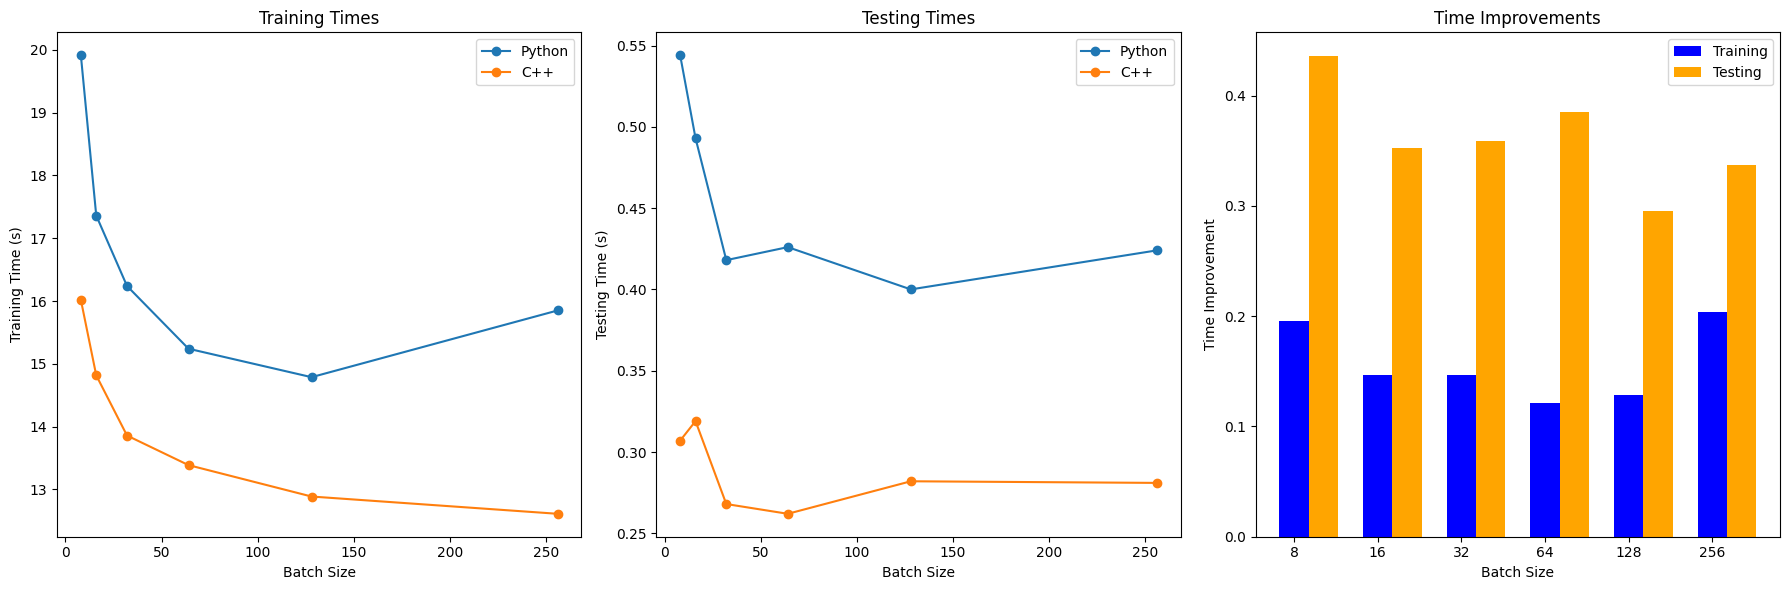

In [36]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot training times
axs[0].plot(batch_sizes, python_training_times, label='Python', marker='o')
axs[0].plot(batch_sizes, cpp_training_times, label='C++', marker='o')
axs[0].set_xlabel('Batch Size')
axs[0].set_ylabel('Training Time (s)')
axs[0].set_title('Training Times')
axs[0].legend()

# Plot testing times
axs[1].plot(batch_sizes, python_testing_times, label='Python', marker='o')
axs[1].plot(batch_sizes, cpp_testing_times, label='C++', marker='o')
axs[1].set_xlabel('Batch Size')
axs[1].set_ylabel('Testing Time (s)')
axs[1].set_title('Testing Times')
axs[1].legend()

# Plot time improvements
bar_width = 0.35
index = range(len(batch_sizes))
axs[2].bar(index, training_time_improvements, bar_width, label='Training', color='blue')
axs[2].bar([i + bar_width for i in index], testing_time_improvements, bar_width, label='Testing', color='orange')
axs[2].set_xlabel('Batch Size')
axs[2].set_ylabel('Time Improvement')
axs[2].set_title('Time Improvements')
axs[2].legend()

plt.xticks(index, batch_sizes)

plt.tight_layout()
plt.savefig('/content/drive/Shareddrives/Runtime Systems   /Runtime Results/batch_sizes.png')
plt.show()

## Epochs

In [37]:
epochs = [5, 10, 20, 40, 70, 100]
python_training_times = [22.164, 42.811, 85.649, 170.509, 341.035, 576.62]
python_testing_times = [0.53, 0.514, 0.526, 0.49, 0.664, 0.894]
cpp_training_times = [16.128, 32.266, 65.018, 127.937, 224.365, 320.088]
cpp_testing_times = [0.336, 0.327, 0.312, 0.343, 0.293, 0.317]
training_time_improvements = [0.2723335138, 0.2463151994, 0.2408784691, 0.2496759702, 0.342105649, 0.4448891818]
testing_time_improvements = [0.3660377358, 0.3638132296, 0.4068441065, 0.3, 0.5587349398, 0.6454138702]

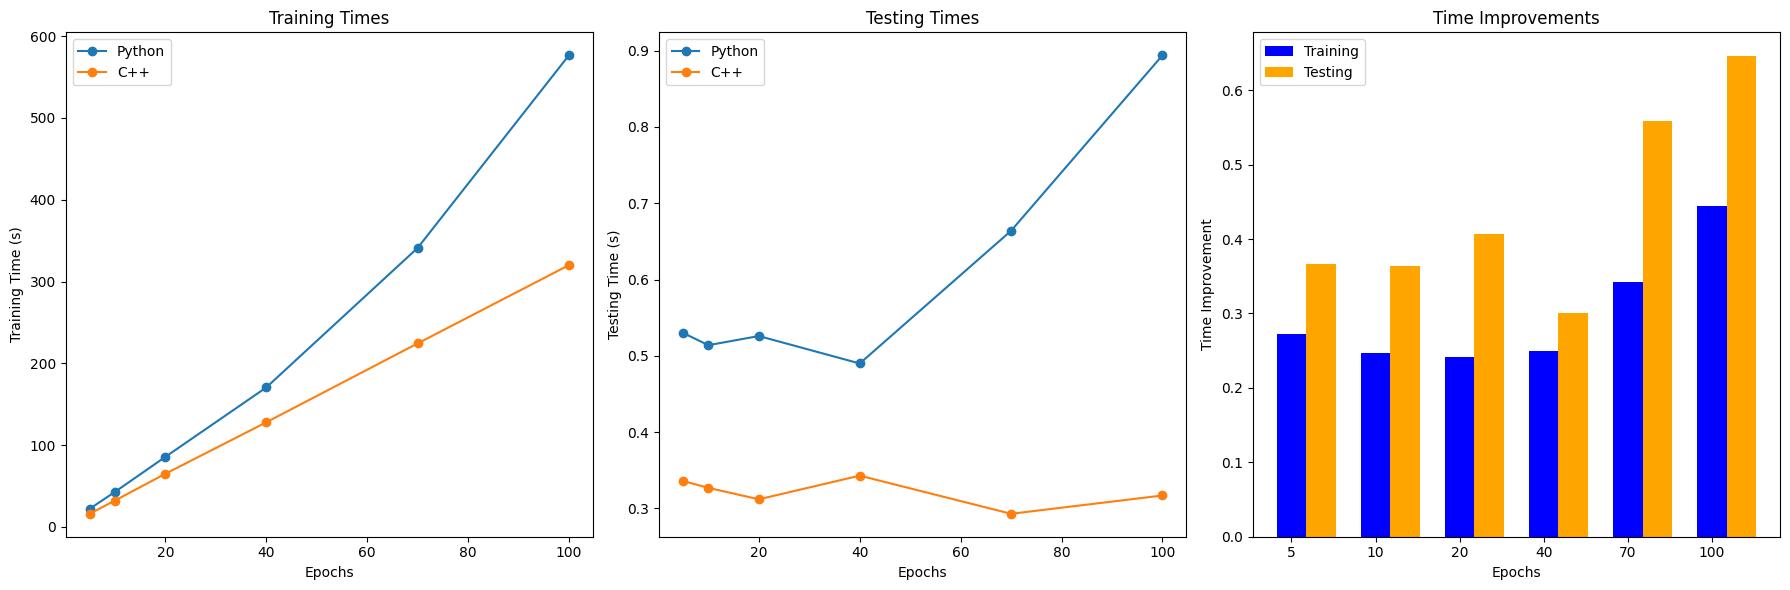

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot training times
axs[0].plot(epochs, python_training_times, label='Python', marker='o')
axs[0].plot(epochs, cpp_training_times, label='C++', marker='o')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Training Time (s)')
axs[0].set_title('Training Times')
axs[0].legend()

# Plot testing times
axs[1].plot(epochs, python_testing_times, label='Python', marker='o')
axs[1].plot(epochs, cpp_testing_times, label='C++', marker='o')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Testing Time (s)')
axs[1].set_title('Testing Times')
axs[1].legend()

# Plot time improvements
bar_width = 0.35
index = range(len(epochs))
axs[2].bar(index, training_time_improvements, bar_width, label='Training', color='blue')
axs[2].bar([i + bar_width for i in index], testing_time_improvements, bar_width, label='Testing', color='orange')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Time Improvement')
axs[2].set_title('Time Improvements')
axs[2].legend()

plt.xticks(index, epochs)

plt.tight_layout()
plt.savefig('/content/drive/Shareddrives/Runtime Systems   /Runtime Results/epochs.png')
plt.show()

## Kernel Sizes

In [39]:
kernel_sizes = [3, 5, 8, 10, 15]
python_training_times = [22.07, 29.616, 50.33, 74.316, 227.572]
python_testing_times = [0.579, 0.659, 1.358, 1.931, 4.275]
cpp_training_times = [15.9, 18.248, 39.391, 60.764, 201.807]
cpp_testing_times = [0.324, 0.368, 1.009, 1.54, 3.873]
training_time_improvements = [0.2795650204, 0.3838465694, 0.2173455196, 0.1823564239, 0.113216916]
testing_time_improvements = [0.4404145078, 0.4415781487, 0.2569955817, 0.2024857587, 0.09403508772]

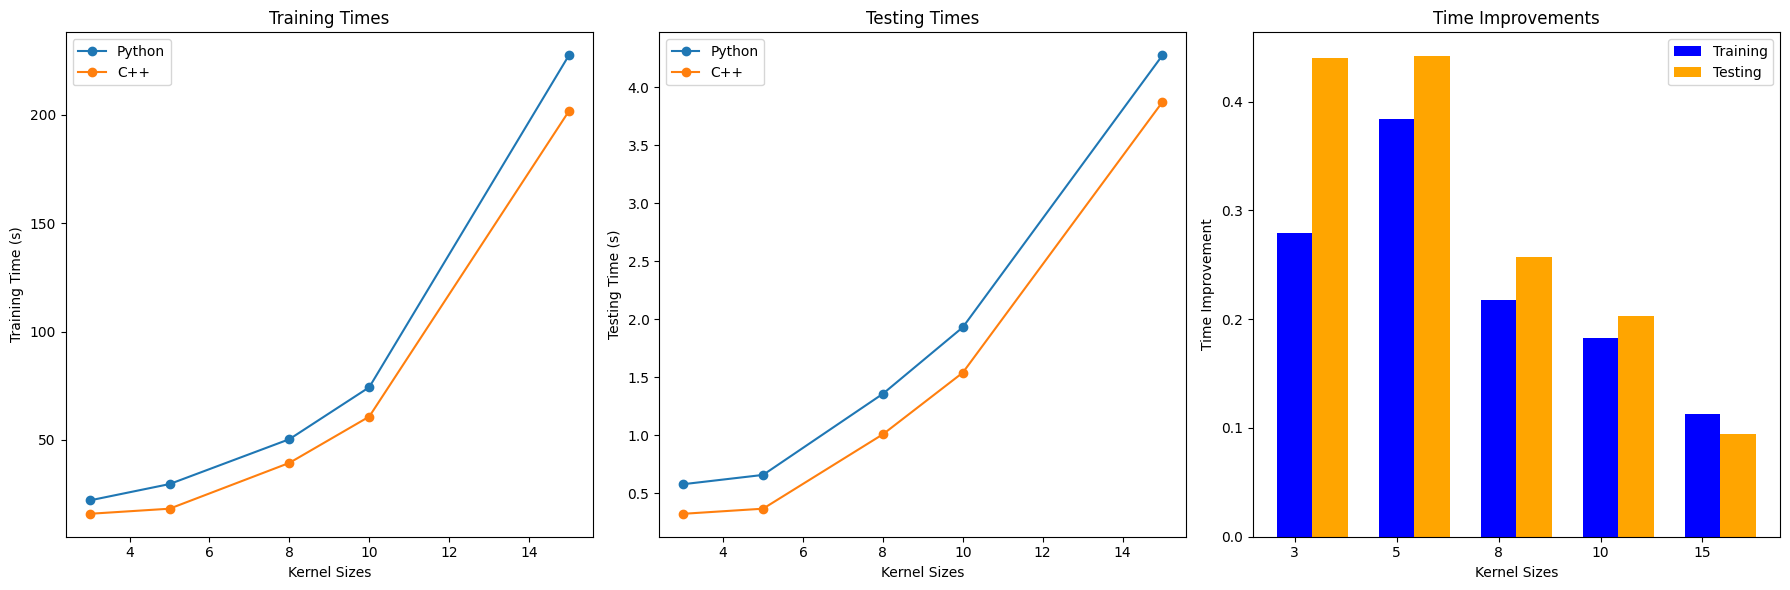

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot training times
axs[0].plot(kernel_sizes, python_training_times, label='Python', marker='o')
axs[0].plot(kernel_sizes, cpp_training_times, label='C++', marker='o')
axs[0].set_xlabel('Kernel Sizes')
axs[0].set_ylabel('Training Time (s)')
axs[0].set_title('Training Times')
axs[0].legend()

# Plot testing times
axs[1].plot(kernel_sizes, python_testing_times, label='Python', marker='o')
axs[1].plot(kernel_sizes, cpp_testing_times, label='C++', marker='o')
axs[1].set_xlabel('Kernel Sizes')
axs[1].set_ylabel('Testing Time (s)')
axs[1].set_title('Testing Times')
axs[1].legend()

# Plot time improvements
bar_width = 0.35
index = range(len(kernel_sizes))
axs[2].bar(index, training_time_improvements, bar_width, label='Training', color='blue')
axs[2].bar([i + bar_width for i in index], testing_time_improvements, bar_width, label='Testing', color='orange')
axs[2].set_xlabel('Kernel Sizes')
axs[2].set_ylabel('Time Improvement')
axs[2].set_title('Time Improvements')
axs[2].legend()

plt.xticks(index, kernel_sizes)

plt.tight_layout()
plt.savefig('/content/drive/Shareddrives/Runtime Systems   /Runtime Results/kernel_sizes.png')
plt.show()

## Number of Layers

In [42]:
num_layers = [3, 4, 5, 6]
python_training_times = [23.232, 30.297, 71.165, 325.563]
python_testing_times = [0.553, 0.673, 1.287, 4.796]
cpp_training_times = [15.774, 21.999, 34.309, 70.43]
cpp_testing_times = [0.299, 0.428, 0.554, 1.048]
training_time_improvements = [0.3210227273, 0.2738885038, 0.5178950327, 0.7836670629]
testing_time_improvements = [0.4593128391, 0.3640416048, 0.5695415695, 0.7814845705]

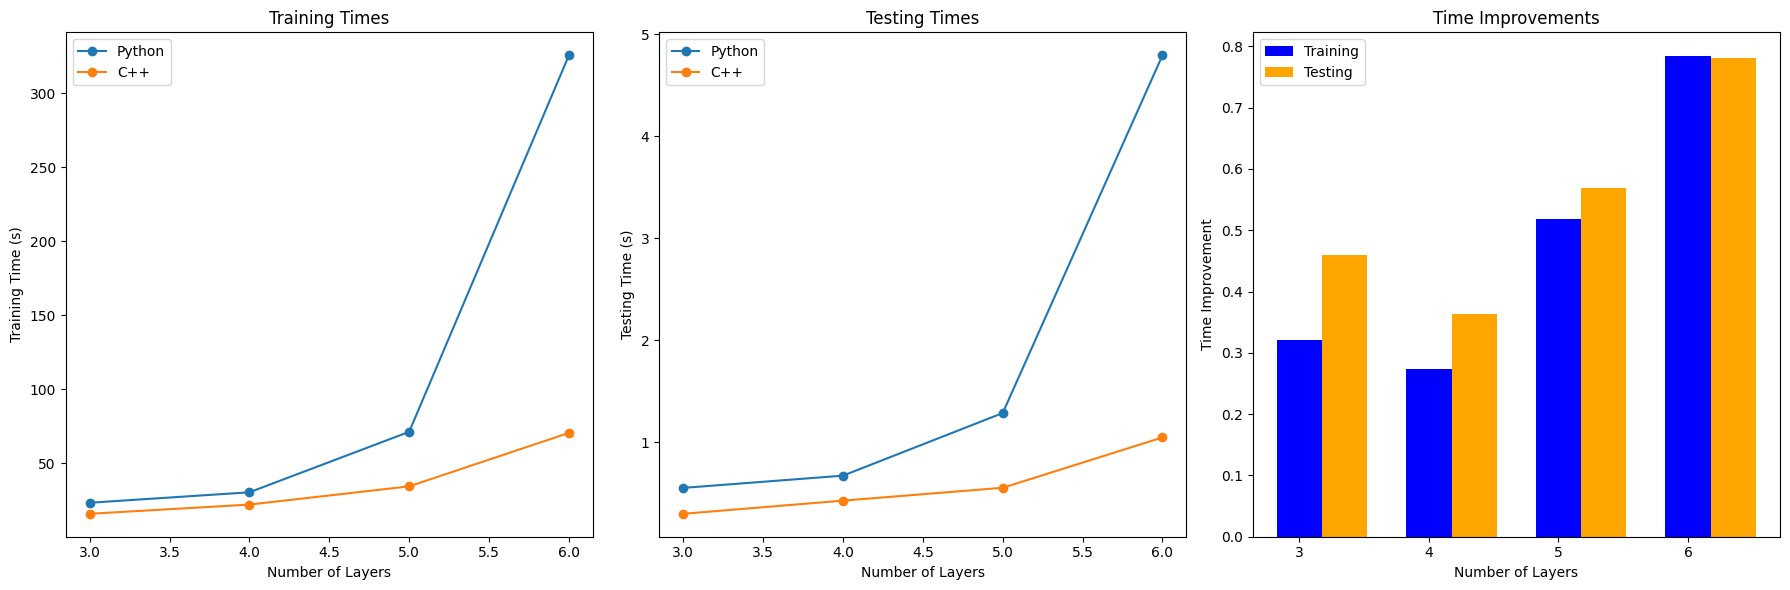

In [43]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot training times
axs[0].plot(num_layers, python_training_times, label='Python', marker='o')
axs[0].plot(num_layers, cpp_training_times, label='C++', marker='o')
axs[0].set_xlabel('Number of Layers')
axs[0].set_ylabel('Training Time (s)')
axs[0].set_title('Training Times')
axs[0].legend()

# Plot testing times
axs[1].plot(num_layers, python_testing_times, label='Python', marker='o')
axs[1].plot(num_layers, cpp_testing_times, label='C++', marker='o')
axs[1].set_xlabel('Number of Layers')
axs[1].set_ylabel('Testing Time (s)')
axs[1].set_title('Testing Times')
axs[1].legend()

# Plot time improvements
bar_width = 0.35
index = range(len(num_layers))
axs[2].bar(index, training_time_improvements, bar_width, label='Training', color='blue')
axs[2].bar([i + bar_width for i in index], testing_time_improvements, bar_width, label='Testing', color='orange')
axs[2].set_xlabel('Number of Layers')
axs[2].set_ylabel('Time Improvement')
axs[2].set_title('Time Improvements')
axs[2].legend()

plt.xticks(index, num_layers)

plt.tight_layout()
plt.savefig('/content/drive/Shareddrives/Runtime Systems   /Runtime Results/num_layers.png')
plt.show()

## Optimizers

In [44]:
optimizers = ['Adam', 'SGD']
python_training_times = [19.727, 17.882]
python_testing_times = [0.404, 0.404]
cpp_training_times = [15.847, 15.061]
cpp_testing_times = [0.301, 0.318]
training_time_improvements = [0.1966847468, 0.1577564031]
testing_time_improvements = [0.254950495, 0.2128712871]

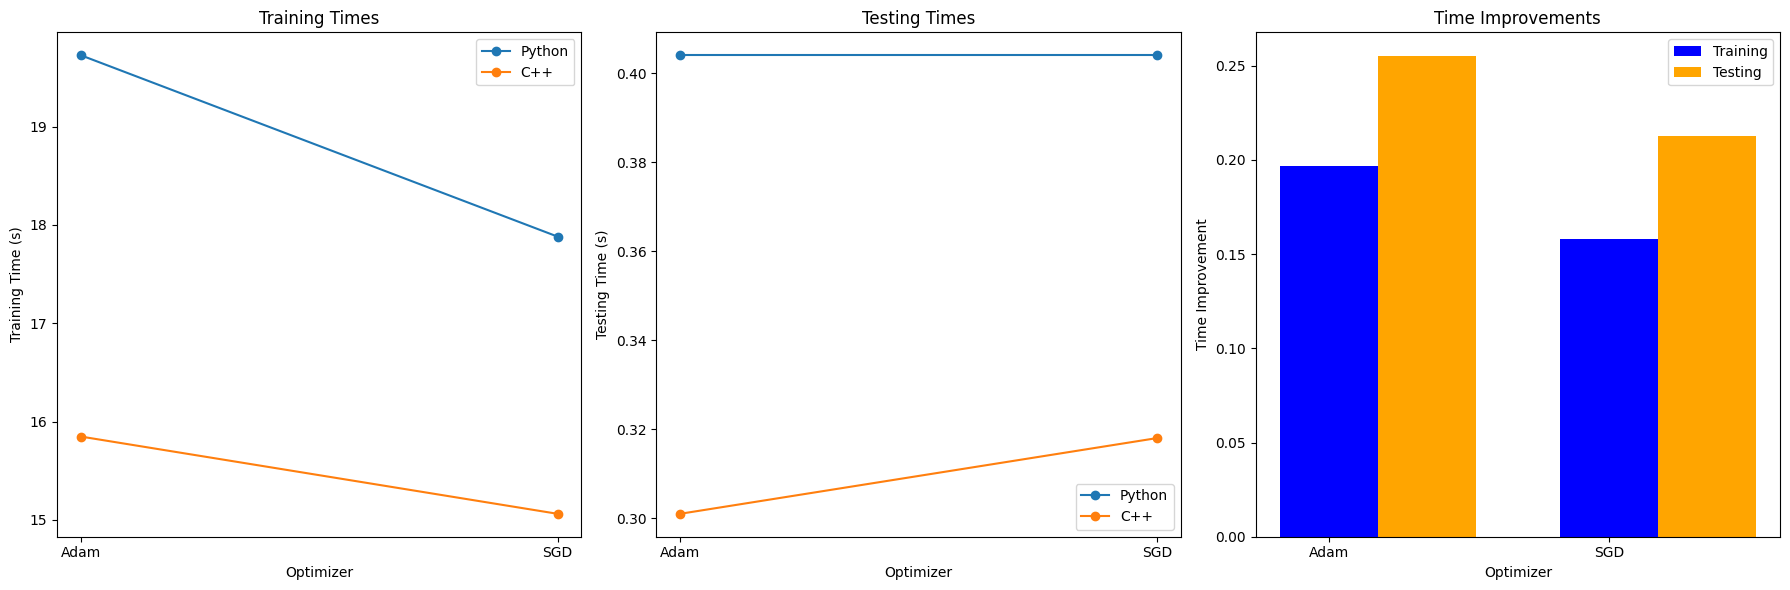

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot training times
index = range(len(optimizers))
axs[0].plot(index, python_training_times, label='Python', marker='o')
axs[0].plot(index, cpp_training_times, label='C++', marker='o')
axs[0].set_xlabel('Optimizer')
axs[0].set_ylabel('Training Time (s)')
axs[0].set_title('Training Times')
axs[0].set_xticks(index)
axs[0].set_xticklabels(optimizers)
axs[0].legend()

# Plot testing times
axs[1].plot(index, python_testing_times, label='Python', marker='o')
axs[1].plot(index, cpp_testing_times, label='C++', marker='o')
axs[1].set_xlabel('Optimizer')
axs[1].set_ylabel('Testing Time (s)')
axs[1].set_title('Testing Times')
axs[1].set_xticks(index)
axs[1].set_xticklabels(optimizers)
axs[1].legend()

# Plot time improvements
bar_width = 0.35
axs[2].bar(index, training_time_improvements, bar_width, label='Training', color='blue')
axs[2].bar([i + bar_width for i in index], testing_time_improvements, bar_width, label='Testing', color='orange')
axs[2].set_xlabel('Optimizer')
axs[2].set_ylabel('Time Improvement')
axs[2].set_title('Time Improvements')
axs[2].legend()

plt.xticks(index, optimizers)

plt.tight_layout()
plt.savefig('/content/drive/Shareddrives/Runtime Systems   /Runtime Results/optimizers.png')
plt.show()